In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import moment

import matplotlib.pyplot as plt
from visualisations import show_task

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
show_task("T6")

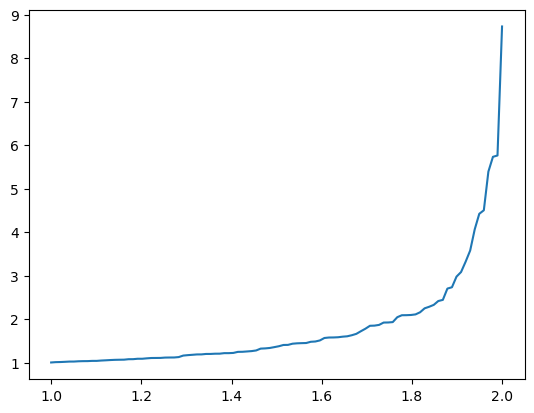

In [3]:
def func1(x, tetha):
    return (1 - x) ** (1 / (1 - tetha))

N = 100
tetha = 3
a = 0.05

np.random.seed(42)
X = [func1(x, tetha) for x in np.random.sample(N)]
X.sort()
x = np.linspace(1, 2, 100)
plt.plot(x, X)
plt.show()

In [4]:
tetha_estimate = N / np.sum(np.log(X)) + 1
print("ОМП: Tetha estimate = ", tetha_estimate)

right = (1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1))
left = (-(1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1)))
print("Доверительный размах для медианы: [", left, ', ', right, ']')
print("Размах = ", right - left)

ОМП: Tetha estimate =  3.1863944109696107
Доверительный размах для медианы: [ 1.287723199859717 ,  1.4583574933745918 ]
Размах =  0.1706342935148748


In [5]:
left0 = -1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate
right0 = 1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate

print("Асимптотический доверительный интервал: [", left0, ', ', right0, ']')
print("Размах = ", right0 - left0)

Асимптотический доверительный интервал: [ 2.757861106419567 ,  3.6149277155196544 ]
Размах =  0.8570666091000874


In [6]:
def func2(X, N):
    return 1 + N / sum([np.log(x) for x in X])

M = np.sort(np.array([func2([func1(x, tetha) for x in np.random.sample(N)], N) for i in range(50000)]))

left2 = M[int(a / 2 * 50000)]
right2 = M[int((1 - a / 2) * 50000)]

print("Бутстраповский параметрический интервал: [", left2, ', ', right2, ']')
print("Размах = ", right2 - left2)

Бутстраповский параметрический интервал: [ 2.659065105749759 ,  3.457153041895431 ]
Размах =  0.7980879361456719


In [7]:
M = np.array([])
for i in range(1000):
    M = np.append(M, N / np.sum(np.log((np.random.choice(X, size = len(X))))) + 1 - tetha_estimate)

M = np.sort(M)

left3 = tetha_estimate + M[74]
right3 = tetha_estimate + M[974]

print("Бутрстраповский непараметрический интервал: [", left3, ', ', right3, ']')
print("Размах = ", left3, ', ', right3, ']')

Бутрстраповский непараметрический интервал: [ 2.9195668464145164 ,  3.71398285022294 ]
Размах =  2.9195668464145164 ,  3.71398285022294 ]


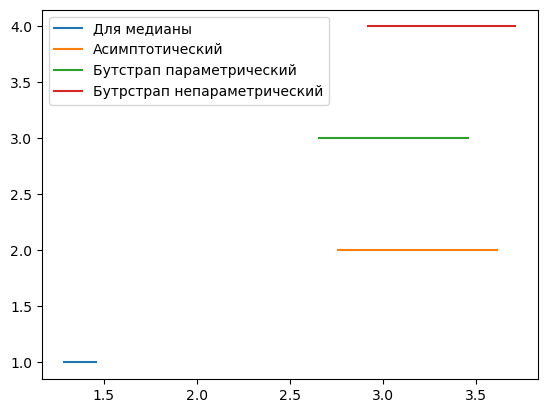

In [8]:

x1 = np.linspace(left, right, 100)
y1 = [1] * 100

x2 = np.linspace(left0, right0, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

x4 = np.linspace(left3, right3, 100)
y4 = [4] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.legend(["Для медианы", "Асимптотический", "Бутстрап параметрический", "Бутрстрап непараметрический"])
